In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data (3).csv


In [36]:
dataset = pd.read_csv('kc_house_data (3).csv')

In [37]:
Y = dataset[['price']]

In [38]:
X = dataset.drop(['price', 'id', 'date'], axis=1)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       7999 non-null   int64  
 1   bathrooms      7999 non-null   float64
 2   sqft_living    7999 non-null   int64  
 3   sqft_lot       7999 non-null   int64  
 4   floors         7999 non-null   float64
 5   waterfront     7999 non-null   int64  
 6   view           7999 non-null   int64  
 7   condition      7999 non-null   int64  
 8   grade          7999 non-null   int64  
 9   sqft_above     7999 non-null   int64  
 10  sqft_basement  7999 non-null   int64  
 11  yr_built       7999 non-null   int64  
 12  yr_renovated   7999 non-null   int64  
 13  zipcode        7999 non-null   int64  
 14  lat            7999 non-null   float64
 15  long           7999 non-null   float64
 16  sqft_living15  7999 non-null   int64  
 17  sqft_lot15     7999 non-null   int64  
dtypes: float

In [40]:
columns = X.columns
columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [41]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,7999.000000,7999.000000,7999.000000,7.999000e+03,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,3.370296,2.066415,2059.633579,1.606885e+04,1.433304,0.007876,0.239530,3.446931,7.605701,1754.982748,304.650831,1967.398175,89.601950,98077.749344,47.560494,-122.213227,1980.192024,13124.162520
std,0.900056,0.765145,916.398535,4.648243e+04,0.511333,0.088402,0.766342,0.664653,1.177877,814.183022,452.529396,27.995420,413.388308,53.907785,0.139880,0.140192,676.797609,25418.764201
min,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,3.000000,1.500000,1410.000000,5.427500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98033.000000,47.463050,-122.325000,1490.000000,5413.000000
50%,3.000000,2.000000,1900.000000,7.881000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.574600,-122.228000,1840.000000,7847.000000
75%,4.000000,2.500000,2500.000000,1.111550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2140.000000,600.000000,1990.000000,0.000000,98118.000000,47.679550,-122.125000,2350.000000,10369.500000
max,9.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8570.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,434728.000000


In [43]:
dataset = dataset.drop(['id', 'date'], axis=1)

In [44]:
dataset.corr(method='pearson')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.305690,0.528864,0.704694,0.090006,0.282190,0.319401,0.405910,0.045832,0.653445,0.611207,0.327375,0.032049,0.141305,-0.050138,0.297197,0.010384,0.586586,0.089289
bedrooms,0.305690,1.000000,0.536406,0.574946,0.025827,0.224959,0.004198,0.093991,0.018223,0.365004,0.469827,0.318994,0.159925,0.032573,-0.145777,0.005626,0.100231,0.386530,0.018543
bathrooms,0.528864,0.536406,1.000000,0.767500,0.086766,0.491962,0.087924,0.214138,-0.094023,0.667919,0.688567,0.315375,0.473853,0.075116,-0.196807,0.036588,0.208833,0.589145,0.099634
sqft_living,0.704694,0.574946,0.767500,1.000000,0.158269,0.393449,0.126912,0.295905,-0.048500,0.764901,0.869769,0.460185,0.318472,0.068143,-0.182094,0.070544,0.207682,0.753470,0.190595
sqft_lot,0.090006,0.025827,0.086766,0.158269,1.000000,0.019796,0.026908,0.059617,-0.016804,0.112981,0.177805,0.000600,0.081244,-0.002649,-0.119925,-0.065238,0.215489,0.151079,0.667052
floors,0.282190,0.224959,0.491962,0.393449,0.019796,1.000000,0.044814,0.060238,-0.222414,0.464106,0.575331,-0.238369,0.399069,0.037222,-0.078286,0.046773,0.150196,0.326310,0.019103
waterfront,0.319401,0.004198,0.087924,0.126912,0.026908,0.044814,1.000000,0.402170,0.025202,0.105476,0.105938,0.066403,-0.010866,0.089797,0.009781,-0.010834,-0.036790,0.107430,0.035246
view,0.405910,0.093991,0.214138,0.295905,0.059617,0.060238,0.402170,1.000000,0.051471,0.256042,0.178319,0.278396,-0.038592,0.112507,0.077531,0.000665,-0.079798,0.296644,0.043312
condition,0.045832,0.018223,-0.094023,-0.048500,-0.016804,-0.222414,0.025202,0.051471,1.000000,-0.127028,-0.148561,0.169073,-0.319018,-0.072645,-0.005189,-0.018367,-0.114968,-0.086573,-0.023745
grade,0.653445,0.365004,0.667919,0.764901,0.112981,0.464106,0.105476,0.256042,-0.127028,1.000000,0.763000,0.176192,0.432789,0.039088,-0.187286,0.113230,0.201871,0.733163,0.136348


<Axes: >

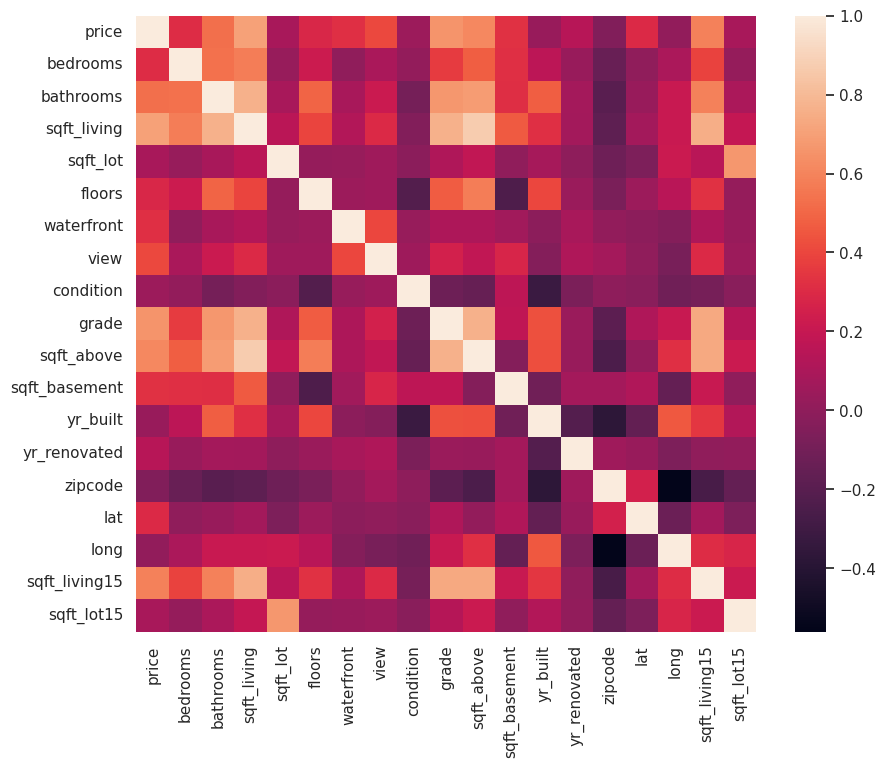

In [45]:
plt.subplots(figsize=(10,8))
sns.heatmap(dataset.corr())

In [46]:
x = X[['sqft_living']]
y = Y

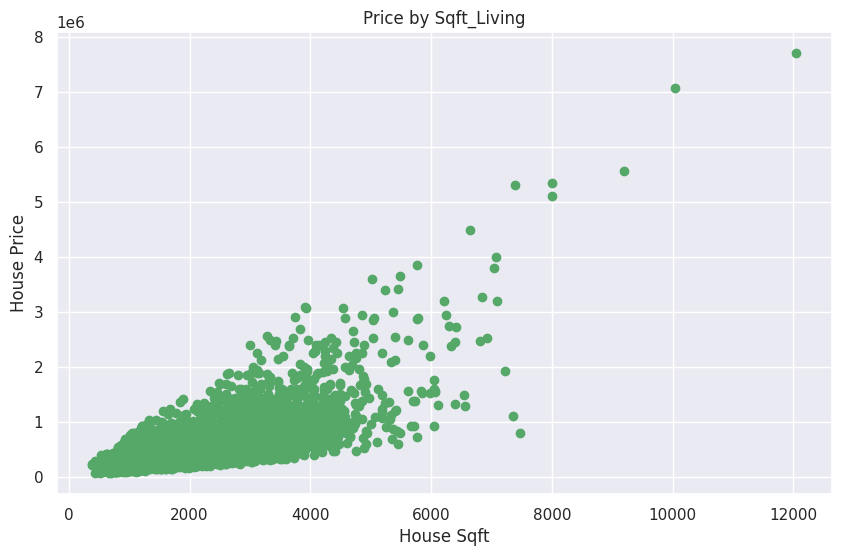

In [47]:
plt.figure(figsize=(10,6))
plt.xlabel('House Sqft')
plt.ylabel('House Price')
plt.title('Price by Sqft_Living')
plt.scatter(x,y, marker='o', color='g')

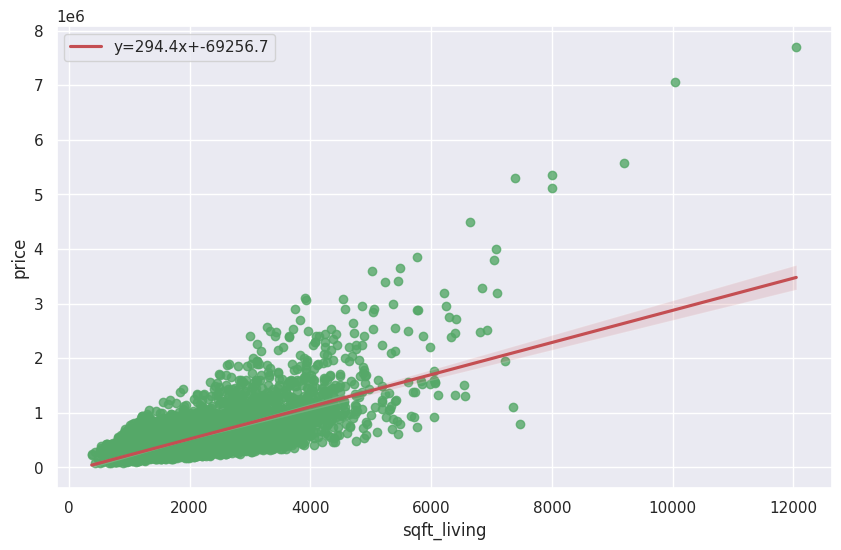

In [48]:
from scipy import stats
sns.set(color_codes=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(dataset['sqft_living'],dataset['price'])

f = plt.figure(figsize=(10,6))
data = dataset[['price', 'sqft_living']]
ax = sns.regplot(x='sqft_living', y='price', data=data, scatter_kws={"color":"g"}, line_kws={'color': 'r', 'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

In [49]:
print(slope, intercept)

294.4447212997311 -69256.72214221302


In [50]:
print(std_err)

3.315114142230116


In [51]:
x = X[['sqft_living']]
y = Y

In [52]:
xg = x.values.reshape(-1,1)
yg = y.values.reshape(-1,1)
xg = np.concatenate((np.ones(len(x)).reshape(-1,1),x), axis=1)

In [53]:
def computeCost(x,y, theta):
  m = len(y)
  h_x = x.dot(theta)
  j = np.sum(np.square(h_x - y))*(1/(2*m))
  return j

In [54]:
def gradientDescent(x, y, theta, alpha, iteration):
  print('Running Gradient Descent...')
  j_hist = []
  m= len(y)
  for i in range(iteration):
    j_hist.append(computeCost(x, y, theta))
    h_x = x.dot(theta)
    theta = theta - ((alpha/m) *((np.dot(x.T, (h_x-y) ))))
  return theta, j_hist

In [55]:
theta = np.zeros((2,1))
iteration = 2000
alpha = 0.001

theta, cost = gradientDescent(xg, yg, theta, alpha, iteration)
print('Theta found by Gradient Descent: slope = {} and intercept {}'.format(theta[1], theta[0]))

Running Gradient Descent...
Theta found by Gradient Descent: slope = [nan] and intercept [nan]


<ipython-input-53-34261e0bdeaf>:4: RuntimeWarning: overflow encountered in square
  j = np.sum(np.square(h_x - y))*(1/(2*m))
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-54-98a9887d0d8c>:8: RuntimeWarning: invalid value encountered in subtract
  theta = theta - ((alpha/m) *((np.dot(x.T, (h_x-y) ))))


In [56]:
theta.shape

(2, 1)

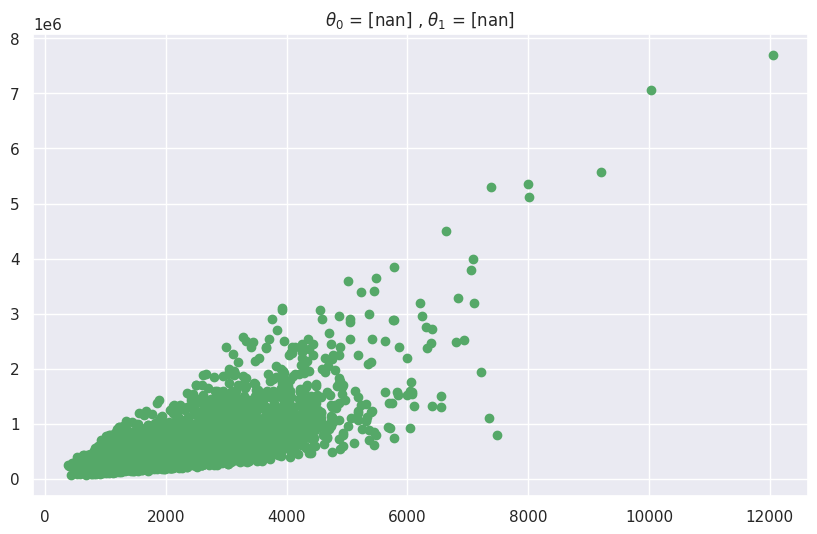

In [57]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(theta[0], theta[1]))
plt.scatter(x,y, marker='o', color='g')
plt.plot(x,np.dot(x.values,theta.T))
plt.show()

Text(0, 0.5, 'Cost')

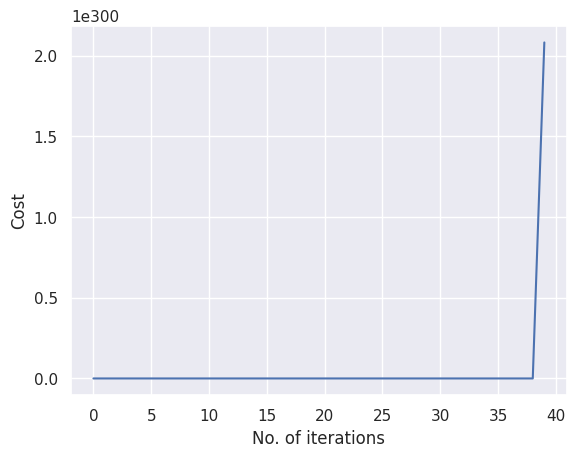

In [58]:
plt.plot(cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

In [59]:
from scipy import stats

xs = x.iloc[:,0]
ys = y.iloc[:,0]

slope, intercept, r_value, p_value, std_err = stats.linregress(xs,ys)

In [60]:
print('Slope = {} and Intercept = {}'.format(slope, intercept))
print('y = x({}) + {}'.format(slope, intercept))

Slope = 294.4447212997311 and Intercept = -69256.72214221302
y = x(294.4447212997311) + -69256.72214221302


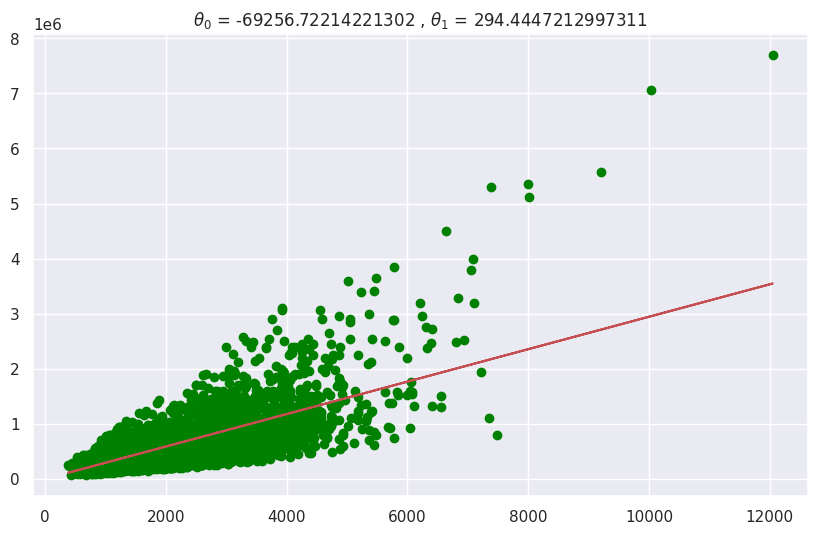

In [61]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(intercept, slope))
plt.scatter(xs,y, marker='o', color='green')
plt.plot(xs, np.dot(x, slope), 'r')

In [62]:
xsl = x.values.reshape(-1,1)
ysl = y.values.reshape(-1,1)
xsl = np.concatenate((np.ones(len(xsl)).reshape(-1,1), xsl), axis=1)

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(xsl[:,1].reshape(-1,1), ysl.reshape(-1,1))
y_hat = slr.predict(xsl[:,1].reshape(-1,1))

print('theta[0] = ', slr.intercept_)
print('theta[1] = ', slr.coef_)

thetas = np.array((slr.intercept_, slr.coef_)).squeeze()

theta[0] =  [-69256.72214221]
theta[1] =  [[294.4447213]]


<ipython-input-62-00b22a709aea>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  thetas = np.array((slr.intercept_, slr.coef_)).squeeze()


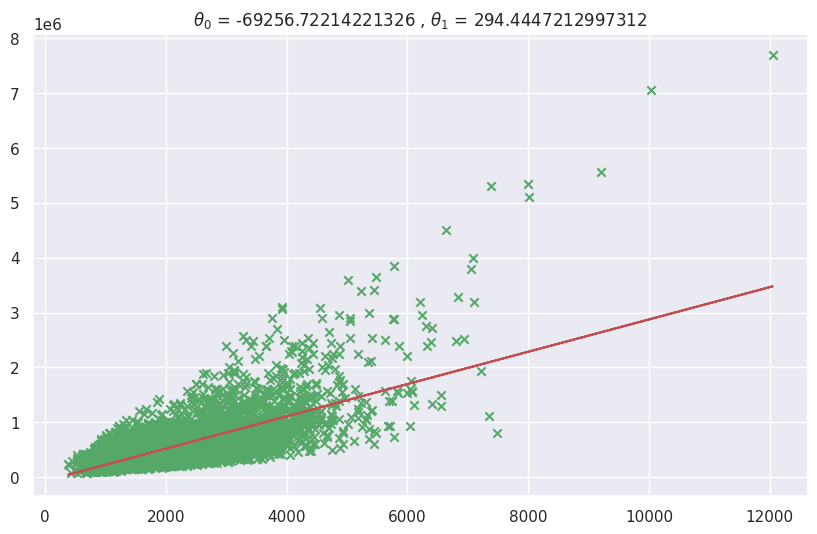

In [63]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(thetas[0], thetas[1]))
plt.scatter(xsl[:,1],y, marker='x', color='g')
plt.plot(xsl[:,1], np.dot(xsl, thetas), 'r')